<h1>Svojstva grafova u pythonu</h1>

In [1]:
import platform

In [2]:
platform.platform()

'Linux-4.17.19-1-MANJARO-x86_64-with-arch-Manjaro-Linux'

In [3]:
platform.python_version()

'3.7.0'

In [4]:
import networkx as nx

In [5]:
nx.__version__

'2.2'

In [6]:
from pylab import *

In [7]:
%matplotlib inline

In [8]:
import DSTG

In [9]:
from IPython.core.display import Image

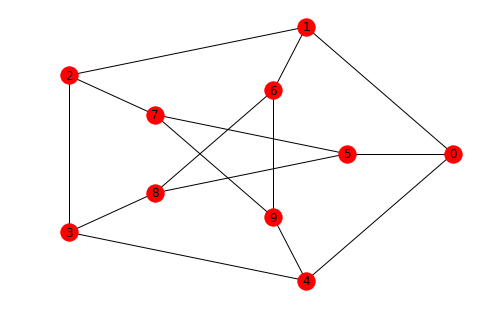

In [10]:
P=nx.petersen_graph()
poz=nx.shell_layout(P,[[5,6,7,8,9],[0,1,2,3,4]])
nx.draw(P,pos=poz,with_labels=True)

## Tri načina spremanja grafa u datoteku

In [11]:
nx.write_adjlist(P,"petersen.adjlist")

In [12]:
nx.write_edgelist(P,"petersen.edgelist")

In [13]:
nx.write_multiline_adjlist(P,"petersen.multiadjlist")

### Sadržaji pojedinih datoteka

In [14]:
dat=open("petersen.adjlist",'r')
d1=dat.read()
dat.close()
dat=open("petersen.edgelist",'r')
d2=dat.read()
dat.close()
dat=open("petersen.multiadjlist",'r')
d3=dat.read()
dat.close()

In [15]:
print(d1)

#/usr/lib/python3.7/site-packages/ipykernel_launcher.py -f /run/user/1000/jupyter/kernel-e3f9fec6-98e7-4e7a-906d-382e42ae8a2b.json
# GMT Tue Oct 16 07:14:08 2018
# Petersen Graph
0 1 4 5
1 2 6
2 3 7
3 4 8
4 9
5 7 8
6 8 9
7 9
8
9



In [16]:
print(d2)

0 1 {}
0 4 {}
0 5 {}
1 2 {}
1 6 {}
2 3 {}
2 7 {}
3 4 {}
3 8 {}
4 9 {}
5 7 {}
5 8 {}
6 8 {}
6 9 {}
7 9 {}



In [17]:
print(d3)

#/usr/lib/python3.7/site-packages/ipykernel_launcher.py -f /run/user/1000/jupyter/kernel-e3f9fec6-98e7-4e7a-906d-382e42ae8a2b.json
# GMT Tue Oct 16 07:14:08 2018
# Petersen Graph
0 3
1 {}
4 {}
5 {}
1 2
2 {}
6 {}
2 2
3 {}
7 {}
3 2
4 {}
8 {}
4 1
9 {}
5 2
7 {}
8 {}
6 2
8 {}
9 {}
7 1
9 {}
8 0
9 0



### Učitavanje grafa iz datoteke

In [18]:
Z1=nx.read_adjlist("petersen.adjlist")
Z2=nx.read_edgelist("petersen.edgelist")
Z3=nx.read_multiline_adjlist("petersen.multiadjlist")

<p style="line-height:30px;">Gornje funkcije imaju i neke dodatne parametre. Npr., create_using govori kakvu vrstu grafa treba napraviti (graf, multigraf, digraf, multidigraf).Po defaultu je create_using=nx.Graph()</p>

In [19]:
Z1=nx.read_adjlist("petersen.adjlist",create_using=nx.Graph())

In [20]:
Z1

In [21]:
Z2

In [22]:
Z3

<h4>Primjer za multigraf</h4>

In [23]:
bridovi=[(0,0),(0,1),(0,1),(0,3),(0,3),(0,4),(1,1),
          (1,2),(1,2),(1,4),(2,2),(2,3),(2,3),(2,4),
               (3,3),(3,4)]

In [24]:
Z=nx.from_edgelist(bridovi,create_using=nx.MultiGraph())

In [25]:
nx.write_adjlist(Z,"multigraf.adjlist")
nx.write_edgelist(Z,"multigraf.edgelist")
nx.write_multiline_adjlist(Z,"multigraf.multiadjlist")

In [26]:
dat=open("multigraf.adjlist",'r')
m1=dat.read()
dat.close()
dat=open("multigraf.edgelist",'r')
m2=dat.read()
dat.close()
dat=open("multigraf.multiadjlist",'r')
m3=dat.read()
dat.close()

In [27]:
print(m1)

#/usr/lib/python3.7/site-packages/ipykernel_launcher.py -f /run/user/1000/jupyter/kernel-e3f9fec6-98e7-4e7a-906d-382e42ae8a2b.json
# GMT Tue Oct 16 07:14:11 2018
# 
0 0 1 1 3 3 4
1 1 2 2 4
3 2 2 3 4
4 2
2 2



In [28]:
print(m2)

0 0 {}
0 1 {}
0 1 {}
0 3 {}
0 3 {}
0 4 {}
1 1 {}
1 2 {}
1 2 {}
1 4 {}
3 2 {}
3 2 {}
3 3 {}
3 4 {}
4 2 {}
2 2 {}



In [29]:
print(m3)

#/usr/lib/python3.7/site-packages/ipykernel_launcher.py -f /run/user/1000/jupyter/kernel-e3f9fec6-98e7-4e7a-906d-382e42ae8a2b.json
# GMT Tue Oct 16 07:14:11 2018
# 
0 6
0 {}
1 {}
1 {}
3 {}
3 {}
4 {}
1 4
1 {}
2 {}
2 {}
4 {}
3 4
2 {}
2 {}
3 {}
4 {}
4 1
2 {}
2 1
2 {}



<h4>Učitavanje multigrafa iz neke od gornjih datoteka</h4>

In [30]:
G1=nx.read_adjlist("multigraf.adjlist",create_using=nx.MultiGraph())

In [31]:
G1viz=nx.nx_agraph.to_agraph(G1)

In [32]:
G1viz.draw('G1.png',prog='dot')

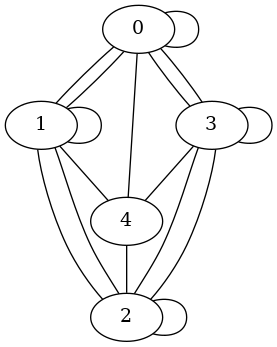

In [33]:
Image(filename='G1.png')

### Učitavanje grafova iz datoteka s kojima ćemo dalje raditi

#### GRAF 1

<h4>Učitavanje grafa iz datoteke i pretvaranje njegovih vrhova u tip integer</h4>

In [34]:
graf1=nx.read_adjlist("graf1.adjlist",nodetype=int)

<h4>vrhovi grafa su cijeli brojevi</h4>

In [35]:
graf1.nodes()

NodeView((1, 2, 3, 4, 5, 6))

<h4>sadrzaj datoteke graf1.adjlist</h4>

In [36]:
datoteka1=open("graf1.adjlist")
print(datoteka1.read())
datoteka1.close()

#graf1
1 2 3 4
2 4 5
3 4 5 6
4 5
5 6
6


<h4>crtanje grafa s eksplicitnim postavkama vrhova</h4>

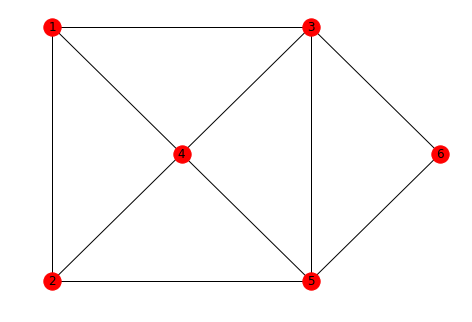

In [37]:
pozicije1={1:(0,2),2:(0,0),3:(2,2),4:(1,1),5:(2,0),6:(3,1)}
nx.draw(graf1,pos=pozicije1,with_labels=True)

<h4>Učitavanje prethodnog grafa iz datoteke, ali bez pretvaranja vrhova u tip integer. Vrhovi će biti tipa string.</h4>

In [38]:
graf1str=nx.read_adjlist("graf1.adjlist")

In [39]:
graf1str.nodes()

NodeView(('1', '2', '3', '4', '5', '6'))

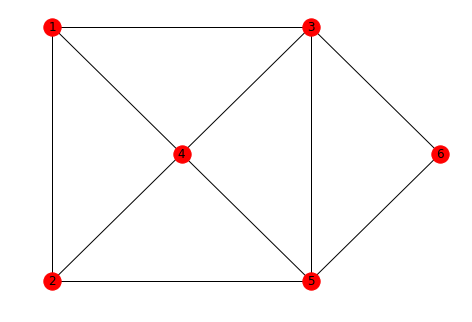

In [40]:
pozicije1str={'1':(0,2),'2':(0,0),'3':(2,2),'4':(1,1),'5':(2,0),'6':(3,1)}
nx.draw(graf1str,pos=pozicije1str,with_labels=True)

#### GRAF 2

<h4>učitavanje multigrafa iz datoteke i pretvaranje vrhova u tip integer</h4>

In [41]:
graf2=nx.read_adjlist("graf2.adjlist",create_using=nx.MultiGraph(),nodetype=int)

<h4>vrhovi grafa su cijeli brojevi</h4>

In [42]:
graf2.nodes()

NodeView((1, 2, 3, 4, 5, 6))

<h4>bridovi</h4>

In [43]:
graf2.edges()

MultiEdgeDataView([(1, 2), (1, 3), (2, 3), (3, 4), (4, 5), (4, 5), (5, 6)])

<h4>sadržaj datoteke graf2.adjlist</h4>

In [44]:
datoteka2=open("graf2.adjlist")
print(datoteka2.read())
datoteka2.close()

#graf2
1 2 3
2 3
3 4
4 5 5
5 6
6


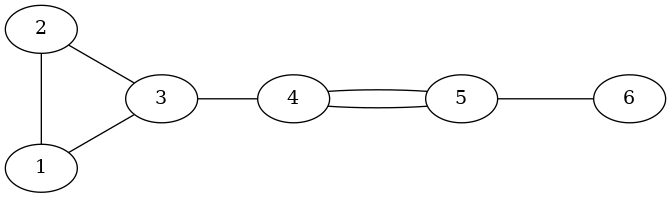

In [45]:
graf2viz=nx.nx_agraph.to_agraph(graf2)
graf2viz.draw('G2.png',prog='circo')
Image(filename='G2.png')

#### GRAF 3

<h4>učitavanje multigrafa iz datoteke i pretvaranje vrhova u tip integer</h4>

In [46]:
graf3=nx.read_adjlist("graf3.adjlist",nodetype=int)

<h4>sadržaj datoteke graf3.adjlist</h4>

In [47]:
datoteka3=open("graf3.adjlist")
print(datoteka3.read())
datoteka3.close()

#graf3
1 2 6
2 3 7 8
3 4
4 5
5 6 7 8
6
7
8


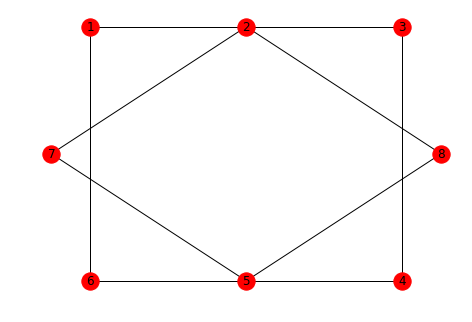

In [48]:
pozicije3={1:(0,2),2:(2,2),3:(4,2),4:(4,0),5:(2,0),6:(0,0),7:(-0.5,1),8:(4.5,1)}
nx.draw(graf3,pos=pozicije3,with_labels=True)

### Je li graf prazan?

<h4>grafovi graf1, graf2 i graf3 nisu prazni jer svaki od njih ima barem jedan brid</h4>

In [49]:
graf1.number_of_edges(),graf2.number_of_edges(),graf3.number_of_edges()

(10, 7, 10)

<h4>možemo definirati svoju funkciju koja će vraćati True ako je graf prazan, a u protivnom False</h4>

In [50]:
def EmptyQ(G):
    if G.number_of_edges()==0:
        return True
    else:
        return False

In [51]:
EmptyQ(graf1),EmptyQ(graf2),EmptyQ(graf3)

(False, False, False)

### Ima li graf petlji?

<h4>grafovi graf1, graf2 i graf3 nemaju petlji</h4>

In [52]:
graf1.number_of_selfloops(),graf2.number_of_selfloops(),graf3.number_of_selfloops()

(0, 0, 0)

## Multigraf

<h4>grafovi graf1 i graf3 nisu multigrafovi, a graf2 jest</h4>

In [53]:
graf1.is_multigraph(),graf2.is_multigraph(),graf3.is_multigraph()

(False, True, False)

### Je li graf usmjeren?

<h4>graf1, graf2 i graf3 su neusmjereni grafovi</h4>

In [54]:
graf1.is_directed(),graf2.is_directed(),graf3.is_directed()

(False, False, False)

### Je li graf bipartitan?

<h4>graf1, graf2 i graf3 nisu bipartitni grafovi</h4>

In [55]:
nx.is_bipartite(graf1),nx.is_bipartite(graf2),nx.is_bipartite(graf3)

(False, False, False)

<h4>kubični graf jest bipartitan</h4>

In [56]:
nx.is_bipartite(nx.cubical_graph())

True

<h4>biparticija kubičnog grafa</h4>

In [57]:
nx.bipartite.sets(nx.cubical_graph())

({0, 2, 5, 7}, {1, 3, 4, 6})

<h4>želimo li biparticije u obliku liste</h4>

In [58]:
skup=nx.bipartite.sets(nx.cubical_graph())
lista1=[x for x in skup[0]]
lista2=[x for x in skup[1]]

In [59]:
lista1,lista2

([0, 2, 5, 7], [1, 3, 4, 6])

### Je li graf povezan?

<h4>graf1, graf2 i graf3 su povezani grafovi</h4>

In [60]:
nx.is_connected(graf1),nx.is_connected(graf2),nx.is_connected(graf3)

(True, True, True)

### broj povezanih komponenti u grafu

In [61]:
nx.number_connected_components(graf1),nx.number_connected_components(graf2),nx.number_connected_components(graf3)

(1, 1, 1)

In [62]:
G=nx.complete_graph(5)
H=nx.complete_bipartite_graph(2,3)
U=nx.disjoint_union(G,H)

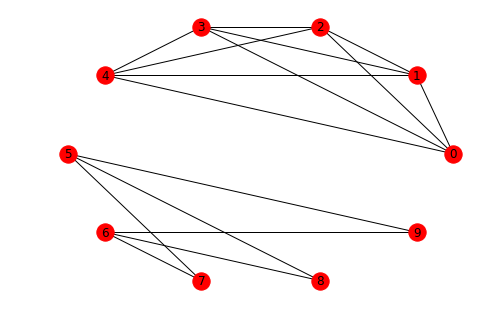

In [63]:
nx.draw_circular(U,with_labels=True)

In [64]:
nx.number_connected_components(U)

2

### komponente povezanosti grafa (vrhovi iz iste komponente)

In [65]:
list(nx.connected_components(U))

[{0, 1, 2, 3, 4}, {5, 6, 7, 8, 9}]

In [66]:
list(nx.connected_components(graf1))

[{1, 2, 3, 4, 5, 6}]

### komponente povezanosti grafa (svaka komponenta kao zasebni graf)

In [67]:
V=list(nx.connected_component_subgraphs(U))

<h4>prva komponenta povezanosti</h4>

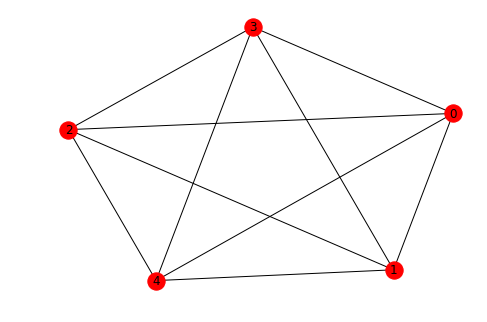

In [68]:
nx.draw(V[0],with_labels=True)

<h4>druga komponenta povezanosti</h4>

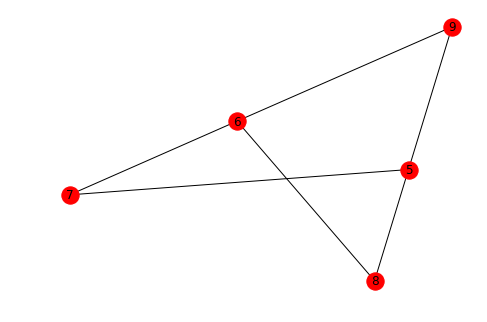

In [69]:
nx.draw(V[1],with_labels=True)

### Je li graf potpun?

<h4>definiramo svoju funkciju</h4>

In [70]:
def CompleteQ(G):
    if G.number_of_selfloops()>0: return False
    if len(set(G.edges()))!=G.number_of_edges(): return False
    if G.number_of_edges()!=(G.number_of_nodes()**2-G.number_of_nodes())/2:
        return False
    else:
        return True

In [71]:
CompleteQ(graf1),CompleteQ(graf2),CompleteQ(graf3)

(False, False, False)

In [72]:
CompleteQ(nx.petersen_graph()),CompleteQ(nx.complete_graph(8))

(False, True)

In [73]:
graf4=nx.read_adjlist("graf4.adjlist",create_using=nx.MultiGraph(),nodetype=int)

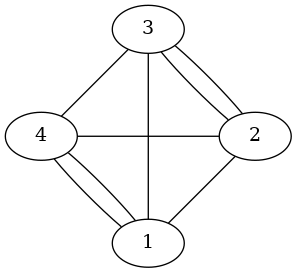

In [74]:
graf4viz=nx.nx_agraph.to_agraph(graf4)
graf4viz.draw('G4.png',prog='circo')
Image(filename='G4.png')

In [75]:
CompleteQ(graf4)

False

### Je li graf jednostavan?

<h4>definiramo svoju funkciju</h4>

In [76]:
def SimpleQ(G):
    if G.number_of_selfloops()>0: return False
    if len(set(G.edges()))!=G.number_of_edges():
        return False
    else:
        return True

In [77]:
SimpleQ(graf1),SimpleQ(graf2),SimpleQ(graf3),SimpleQ(graf4),SimpleQ(nx.petersen_graph())

(True, False, True, False, True)

### Je li graf regularan?

<h4>ukoliko je graf regularan funkcija vraća True i stupanj regularnosti, a u protivnom vraća samo False</h4>

In [78]:
list(dict(graf1.degree()).values())

[3, 3, 4, 4, 4, 2]

In [79]:
def RegularQ(G):
    if len(list(dict(graf1.degree()).values()))==1:
        return (True,G.degree().values()[0])
    else:
        return False

In [80]:
RegularQ(graf1),RegularQ(graf2),RegularQ(graf3),RegularQ(graf4),RegularQ(nx.complete_graph(8)),RegularQ(nx.petersen_graph())

(False, False, False, False, False, False)

### Je li graf aciklički?

In [81]:
def AcyclicQ(G):
    if G.number_of_edges()==G.number_of_nodes()-nx.number_connected_components(G):
        return True
    else:
        return False

In [82]:
AcyclicQ(graf1), AcyclicQ(graf2), AcyclicQ(graf3), AcyclicQ(nx.path_graph(7))

(False, False, False, True)

### Je li graf stablo?

In [83]:
def TreeQ(G):
    if nx.number_connected_components(G)==1 and G.number_of_edges()==G.number_of_nodes()-1:
        return True
    else:
        return False

In [84]:
TreeQ(graf1),TreeQ(graf2),TreeQ(graf3),TreeQ(nx.star_graph(5))

(False, False, False, True)

### Je li graf Eulerov?

In [85]:
nx.is_eulerian(graf1), nx.is_eulerian(graf2), nx.is_eulerian(graf3)

(False, False, True)

In [86]:
nx.is_eulerian(nx.complete_graph(11)), nx.is_eulerian(nx.complete_graph(10))

(True, False)

#### Eulerova tura u grafu graf3

In [87]:
DSTG.ispis(list(nx.eulerian_circuit(graf3)),80)

[(1, 6), (6, 5), (5, 8), (8, 2), (2, 7), (7, 5), (5, 4), (4, 3), (3, 2), (2, 1)]


## susjedni vrhovi nekog vrha u grafu

<h4>susjedni vrhovi vrha 2 u grafu graf1</h4>

In [88]:
list(graf1.neighbors(2))

[1, 4, 5]

In [89]:
[n for n in graf1.neighbors(2)]

[1, 4, 5]

<h4>susjedni vrhovi vrha 4 u grafu graf3</h4>

In [90]:
list(graf3.neighbors(4))

[3, 5]

In [91]:
[n for n in graf3.neighbors(4)]

[3, 5]

## udaljenost dva vrha u grafu

In [92]:
nx.shortest_path_length(graf2,3,1)

1

In [93]:
nx.shortest_path_length(graf2,2,5)

3

## Najkraći put između dva vrha u grafu

In [94]:
nx.shortest_path(graf2,3,1)

[3, 1]

In [95]:
nx.shortest_path(graf2,2,5)

[2, 3, 4, 5]

In [96]:
nx.shortest_path(graf3,1,7)

[1, 2, 7]

## Udaljenost od zadanog vrha prema svim preostalim vrhovima u grafu

In [97]:
nx.shortest_path_length(graf2,2)

{2: 0, 1: 1, 3: 1, 4: 2, 5: 3, 6: 4}

In [98]:
nx.shortest_path_length(graf2,4)

{4: 0, 3: 1, 5: 1, 1: 2, 2: 2, 6: 2}

In [99]:
nx.shortest_path_length(graf3,1)

{1: 0, 2: 1, 6: 1, 3: 2, 7: 2, 8: 2, 5: 2, 4: 3}

## Najkraći putovi od zadanog vrha prema svim preostalim vrhovima u grafu

In [100]:
nx.shortest_path(graf2,2)

{2: [2],
 1: [2, 1],
 3: [2, 3],
 4: [2, 3, 4],
 5: [2, 3, 4, 5],
 6: [2, 3, 4, 5, 6]}

In [101]:
nx.shortest_path(graf2,4)

{4: [4], 3: [4, 3], 5: [4, 5], 1: [4, 3, 1], 2: [4, 3, 2], 6: [4, 5, 6]}

In [102]:
nx.shortest_path(graf3,1)

{1: [1],
 2: [1, 2],
 6: [1, 6],
 3: [1, 2, 3],
 7: [1, 2, 7],
 8: [1, 2, 8],
 5: [1, 6, 5],
 4: [1, 2, 3, 4]}

In [103]:
nx.single_source_shortest_path(graf2,4)

{4: [4], 3: [4, 3], 5: [4, 5], 1: [4, 3, 1], 2: [4, 3, 2], 6: [4, 5, 6]}

## Najkraće udaljenosti između svaka dva vrha u grafu

In [104]:
list(nx.shortest_path_length(graf1))

[(1, {1: 0, 2: 1, 3: 1, 4: 1, 5: 2, 6: 2}),
 (2, {2: 0, 1: 1, 4: 1, 5: 1, 3: 2, 6: 2}),
 (3, {3: 0, 1: 1, 4: 1, 5: 1, 6: 1, 2: 2}),
 (4, {4: 0, 1: 1, 2: 1, 3: 1, 5: 1, 6: 2}),
 (5, {5: 0, 2: 1, 3: 1, 4: 1, 6: 1, 1: 2}),
 (6, {6: 0, 3: 1, 5: 1, 1: 2, 4: 2, 2: 2})]

In [105]:
list(nx.shortest_path_length(graf2))

[(1, {1: 0, 2: 1, 3: 1, 4: 2, 5: 3, 6: 4}),
 (2, {2: 0, 1: 1, 3: 1, 4: 2, 5: 3, 6: 4}),
 (3, {3: 0, 1: 1, 2: 1, 4: 1, 5: 2, 6: 3}),
 (4, {4: 0, 3: 1, 5: 1, 1: 2, 2: 2, 6: 2}),
 (5, {5: 0, 4: 1, 6: 1, 3: 2, 1: 3, 2: 3}),
 (6, {6: 0, 5: 1, 4: 2, 3: 3, 1: 4, 2: 4})]

In [106]:
list(nx.shortest_path_length(graf3))

[(1, {1: 0, 2: 1, 6: 1, 3: 2, 7: 2, 8: 2, 5: 2, 4: 3}),
 (2, {2: 0, 1: 1, 3: 1, 7: 1, 8: 1, 6: 2, 4: 2, 5: 2}),
 (6, {6: 0, 1: 1, 5: 1, 2: 2, 4: 2, 7: 2, 8: 2, 3: 3}),
 (3, {3: 0, 2: 1, 4: 1, 1: 2, 7: 2, 8: 2, 5: 2, 6: 3}),
 (7, {7: 0, 2: 1, 5: 1, 1: 2, 3: 2, 8: 2, 4: 2, 6: 2}),
 (8, {8: 0, 2: 1, 5: 1, 1: 2, 3: 2, 7: 2, 4: 2, 6: 2}),
 (4, {4: 0, 3: 1, 5: 1, 2: 2, 6: 2, 7: 2, 8: 2, 1: 3}),
 (5, {5: 0, 4: 1, 6: 1, 7: 1, 8: 1, 3: 2, 1: 2, 2: 2})]

## Najkraći putovi između svaka dva vrha u grafu

In [107]:
nx.shortest_path(graf1)

{1: {1: [1], 2: [1, 2], 3: [1, 3], 4: [1, 4], 5: [1, 2, 5], 6: [1, 3, 6]},
 2: {2: [2], 1: [2, 1], 4: [2, 4], 5: [2, 5], 3: [2, 1, 3], 6: [2, 5, 6]},
 3: {3: [3], 1: [3, 1], 4: [3, 4], 5: [3, 5], 6: [3, 6], 2: [3, 1, 2]},
 4: {4: [4], 1: [4, 1], 2: [4, 2], 3: [4, 3], 5: [4, 5], 6: [4, 3, 6]},
 5: {5: [5], 2: [5, 2], 3: [5, 3], 4: [5, 4], 6: [5, 6], 1: [5, 2, 1]},
 6: {6: [6], 3: [6, 3], 5: [6, 5], 1: [6, 3, 1], 4: [6, 3, 4], 2: [6, 5, 2]}}

In [108]:
nx.shortest_path(graf2)

{1: {1: [1],
  2: [1, 2],
  3: [1, 3],
  4: [1, 3, 4],
  5: [1, 3, 4, 5],
  6: [1, 3, 4, 5, 6]},
 2: {2: [2],
  1: [2, 1],
  3: [2, 3],
  4: [2, 3, 4],
  5: [2, 3, 4, 5],
  6: [2, 3, 4, 5, 6]},
 3: {3: [3], 1: [3, 1], 2: [3, 2], 4: [3, 4], 5: [3, 4, 5], 6: [3, 4, 5, 6]},
 4: {4: [4], 3: [4, 3], 5: [4, 5], 1: [4, 3, 1], 2: [4, 3, 2], 6: [4, 5, 6]},
 5: {5: [5],
  4: [5, 4],
  6: [5, 6],
  3: [5, 4, 3],
  1: [5, 4, 3, 1],
  2: [5, 4, 3, 2]},
 6: {6: [6],
  5: [6, 5],
  4: [6, 5, 4],
  3: [6, 5, 4, 3],
  1: [6, 5, 4, 3, 1],
  2: [6, 5, 4, 3, 2]}}

In [109]:
nx.shortest_path(graf3)

{1: {1: [1],
  2: [1, 2],
  6: [1, 6],
  3: [1, 2, 3],
  7: [1, 2, 7],
  8: [1, 2, 8],
  5: [1, 6, 5],
  4: [1, 2, 3, 4]},
 2: {2: [2],
  1: [2, 1],
  3: [2, 3],
  7: [2, 7],
  8: [2, 8],
  6: [2, 1, 6],
  4: [2, 3, 4],
  5: [2, 7, 5]},
 6: {6: [6],
  1: [6, 1],
  5: [6, 5],
  2: [6, 1, 2],
  4: [6, 5, 4],
  7: [6, 5, 7],
  8: [6, 5, 8],
  3: [6, 1, 2, 3]},
 3: {3: [3],
  2: [3, 2],
  4: [3, 4],
  1: [3, 2, 1],
  7: [3, 2, 7],
  8: [3, 2, 8],
  5: [3, 4, 5],
  6: [3, 2, 1, 6]},
 7: {7: [7],
  2: [7, 2],
  5: [7, 5],
  1: [7, 2, 1],
  3: [7, 2, 3],
  8: [7, 2, 8],
  4: [7, 5, 4],
  6: [7, 5, 6]},
 8: {8: [8],
  2: [8, 2],
  5: [8, 5],
  1: [8, 2, 1],
  3: [8, 2, 3],
  7: [8, 2, 7],
  4: [8, 5, 4],
  6: [8, 5, 6]},
 4: {4: [4],
  3: [4, 3],
  5: [4, 5],
  2: [4, 3, 2],
  6: [4, 5, 6],
  7: [4, 5, 7],
  8: [4, 5, 8],
  1: [4, 3, 2, 1]},
 5: {5: [5],
  4: [5, 4],
  6: [5, 6],
  7: [5, 7],
  8: [5, 8],
  3: [5, 4, 3],
  1: [5, 6, 1],
  2: [5, 7, 2]}}

## Ekscentricitet vrha - maksimalna udaljenost vrha od svih preostalih vrhova u grafu

In [110]:
nx.eccentricity(graf1)

{1: 2, 2: 2, 3: 2, 4: 2, 5: 2, 6: 2}

In [111]:
nx.eccentricity(graf2)

{1: 4, 2: 4, 3: 3, 4: 2, 5: 3, 6: 4}

In [112]:
nx.eccentricity(graf3)

{1: 3, 2: 2, 6: 3, 3: 3, 7: 2, 8: 2, 4: 3, 5: 2}

In [113]:
nx.eccentricity(graf2,1)

4

## Radijus grafa - minimalni ekscentricitet

In [114]:
nx.radius(graf1)

2

In [115]:
nx.radius(graf2)

2

In [116]:
nx.radius(graf3)

2

## Dijametar grafa - maksimalni ekscentricitet

In [117]:
nx.diameter(graf1)

2

In [118]:
nx.diameter(graf2)

4

In [119]:
nx.diameter(graf3)

3

## Struk grafa

In [120]:
DSTG.struk(graf1)

3

In [121]:
DSTG.struk(graf2)

2

In [122]:
DSTG.struk(graf3)

4

## Rezni bridovi

<p>Ovdje je dana samo naivna implementacija koja daje sve rezne bridove grafa. Jednostavno se prolazi kroz sve bridove grafa i ako brisanjem brida novi graf ima više komponenata povezanosti od početnog grafa, tada je taj obrisani brid rezni brid. Kasnije ćemo dati efikasniju implementaciju koja ne prolazi kroz sve bridove grafa jer se koristi činjenica da je neki brid u povezanom grafu rezni ako i samo ako pripada svakom razapinjućem stablu tog grafa. Za male grafove je i ova naivna implementacija zadovoljavajuća.</p>
<p>Postoji i gotova naredba u NetworkX modulu koja daje sve rezne bridove u jednostavnom grafu.</p>

In [123]:
def rezni_bridovi(G): 
    rezni=[] 
    for brid in G.edges(): 
        graf=G.copy() 
        graf.remove_edge(*brid) 
        if nx.number_connected_components(graf)>nx.number_connected_components(G): 
            rezni.append(brid) 
    return rezni

In [124]:
rezni_bridovi(graf1)

[]

In [125]:
list(nx.algorithms.bridges(graf1))

[]

In [126]:
rezni_bridovi(graf2)

[(3, 4), (5, 6)]

In [127]:
rezni_bridovi(graf3)

[]

In [128]:
list(nx.algorithms.bridges(graf3))

[]

## Bridna povezanost grafa 
<p>koliko najmanje bridova treba ukloniti iz grafa da on postane nepovezan</p>

In [129]:
DSTG.minimum_edge_cut(graf1)

(2, [[6], [1, 2, 3, 4, 5]], [(6, 3), (6, 5)])

In [130]:
nx.edge_connectivity(graf1)

2

In [131]:
bridovi1 = nx.minimum_edge_cut(graf1)
bridovi1

{(6, 3), (6, 5)}

In [132]:
G1 = graf1.copy()
G1.remove_edges_from(bridovi1)
list(nx.connected_components(G1))

[{1, 2, 3, 4, 5}, {6}]

In [133]:
DSTG.minimum_edge_cut(graf2)

(1, [[6], [1, 2, 3, 4, 5]], [(6, 5)])

In [134]:
nx.edge_connectivity(graf2)

1

In [135]:
nx.minimum_edge_cut(graf2)

{(5, 6)}

In [136]:
DSTG.minimum_edge_cut(graf3)

(2, [[8], [1, 2, 3, 4, 5, 6, 7]], [(8, 2), (8, 5)])

In [137]:
nx.edge_connectivity(graf3)

2

In [138]:
nx.minimum_edge_cut(graf3)

{(1, 2), (6, 5)}

In [139]:
G3 = graf3.copy()
G3.remove_edges_from([(1,2),(6,5)])
list(nx.connected_components(G3))

[{1, 6}, {2, 3, 4, 5, 7, 8}]

## Vršna povezanost, rezni vrhovi i bikomponente
<p>koliko najmanje vrhova treba ukloniti iz grafa da on postane nepovezan</p>

<h4>graf1 nema reznih vrhova</h4>

In [140]:
nx.node_connectivity(graf1)

2

In [141]:
nx.minimum_node_cut(graf1)

{3, 5}

In [142]:
list(nx.all_node_cuts(graf1))

[{3, 5}]

In [143]:
list(nx.biconnected_components(graf1))

[{1, 2, 3, 4, 5, 6}]

<h4>graf2 ima tri rezna vrha: 3, 4, 5</h4>

In [144]:
nx.node_connectivity(graf2)

1

In [145]:
list(nx.all_node_cuts(graf2))

[{3}, {4}, {5}]

In [146]:
list(nx.biconnected_components(graf2))

[{5, 6}, {4, 5}, {3, 4}, {1, 2, 3}]

<h4>graf3 nema reznih vrhova</h4>

In [147]:
nx.node_connectivity(graf3)

2

In [148]:
nx.minimum_node_cut(graf2)

{5}

In [149]:
list(nx.all_node_cuts(graf3))

[{2, 5}, {3, 5}, {1, 5}, {2, 6}, {2, 4}]

In [150]:
list(nx.biconnected_components(graf3))

[{1, 2, 3, 4, 5, 6, 7, 8}]

<div style="background-color: #F5FFFA; border: 2px solid #B0C4DE; border-radius: 15px; padding:0px 10px 25px; overflow:auto">
<h3>Zadatak</h3>
<p>Zadana je matrica susjedstva $A=\begin{bmatrix}1&2&1&0\\ 2&0&1&0\\ 1&1&0&0\\ 0&0&0&0\end{bmatrix}$,  čiji su vrhovi redom $v_1, v_2, v_3, v_4$.</p>
<ol style="list-style-type:lower-alpha;">
    <li style="line-height:25px;">Ima li petlji u grafu? Da li je graf jednostavan?</li>
    <li style="line-height:25px;">Ima li izoliranih vrhova u grafu?</li>
    <li style="line-height:25px;">Izračunajte stupnjeve svih vrhova.</li>
    <li style="line-height:25px;">Nacrtajte graf.</li>
    <li style="line-height:25px;">Odredite broj šetnji duljine 2 i duljine 3 između vrhova $v_1$ i $v_2$, te vrhova $v_1$ i $v_4$.</li>
</ol>
</div>
<h3>Rješenje</h3>

<h4>Konstrukcija grafa</h4>

In [151]:
A=np.matrix([[1,2,1,0],[2,0,1,0],[1,1,0,0],[0,0,0,0]])
A1=np.matrix([[1,1,1,0],[1,0,1,0],[0,0,0,0],[0,0,0,0]])

In [152]:
G=nx.MultiGraph(A1)

In [153]:
H=nx.relabel_nodes(G,{0:'v1',1:'v2',2:'v3',3:'v4'})

#### U grafu je jedna petlja kod vrha $v_1$ pa graf nije jednostavan

In [154]:
H.number_of_selfloops()

1

In [155]:
list(H.selfloop_edges())

[('v1', 'v1')]

#### $v_4$ je izolirani vrh u promatranom grafu

In [156]:
H.degree()

MultiDegreeView({'v1': 4, 'v2': 2, 'v3': 2, 'v4': 0})

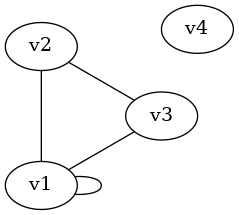

In [157]:
Hviz=nx.nx_agraph.to_agraph(H)
Hviz.draw('H.png',prog='circo')
Image(filename='H.png')

#### Ukupno ima 3 $(v_1,v_2)$-šetnje duljine 2 u promatranom grafu. Nadalje, nema niti jedne $(v_1,v_4)$-šetnje duljine 2 u promatranom grafu.

In [158]:
print(A**2)

[[6 3 3 0]
 [3 5 2 0]
 [3 2 2 0]
 [0 0 0 0]]


In [159]:
(A**2)[0,1]

3

In [160]:
(A**2)[0,3]

0

#### Ukupno ima 15 $(v_1,v_2)$-šetnje duljine 3 u promatranom grafu. Nadalje, nema niti jedne $(v_1,v_4)$-šetnje duljine 3 u promatranom grafu.

In [161]:
print(A**3)

[[15 15  9  0]
 [15  8  8  0]
 [ 9  8  5  0]
 [ 0  0  0  0]]


In [162]:
(A**3)[0,1]

15

In [163]:
(A**3)[0,3]

0

## Konjićeva tura

<p>Ovdje je pokazano kako na lagani način možemo generirati graf kojim se modelira problem konjićeve ture na $m\times n$ ploči. Vi možete ići korak dalje i implementirati neki algoritam koji će u zadanom grafu pronaći Hamiltonov ciklus, ukoliko je zadani graf Hamiltonov.</p>

In [164]:
import itertools

In [165]:
def konjic_skok(m,n): 
    vrhovi=list(itertools.product(range(1,m+1),range(1,n+1)))
    bridovi=[(i,j) for i in vrhovi for j in vrhovi if (abs(i[0]-j[0])==1 and abs(i[1]-j[1])==2) or 
             (abs(i[0]-j[0])==2 and abs(i[1]-j[1])==1)]
    G=nx.Graph()
    G.add_nodes_from(vrhovi)
    G.add_edges_from(bridovi)
    return G

In [166]:
def pozicije_konjic(m,n): 
    pozicije={} 
    for i in range(1,m+1): 
        for j in range(1,n+1): 
            pozicije[(i,j)]=(i,j) 
    return pozicije 

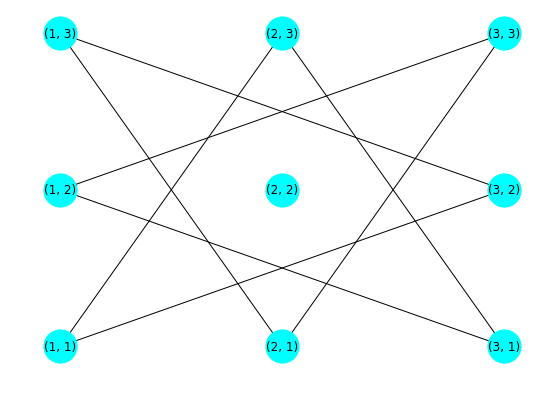

In [167]:
figure(figsize=(7,5))
nx.draw(konjic_skok(3,3),pos=pozicije_konjic(3,3),node_size=1100,node_color='cyan',with_labels=True)

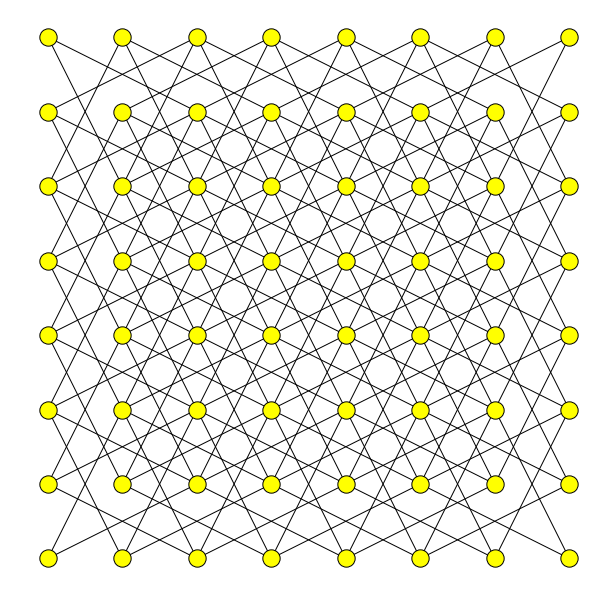

In [168]:
figure(figsize=(8,8))
nx.draw(konjic_skok(8,8),pos=pozicije_konjic(8,8),node_size=300,node_color='yellow',edgecolors='black')

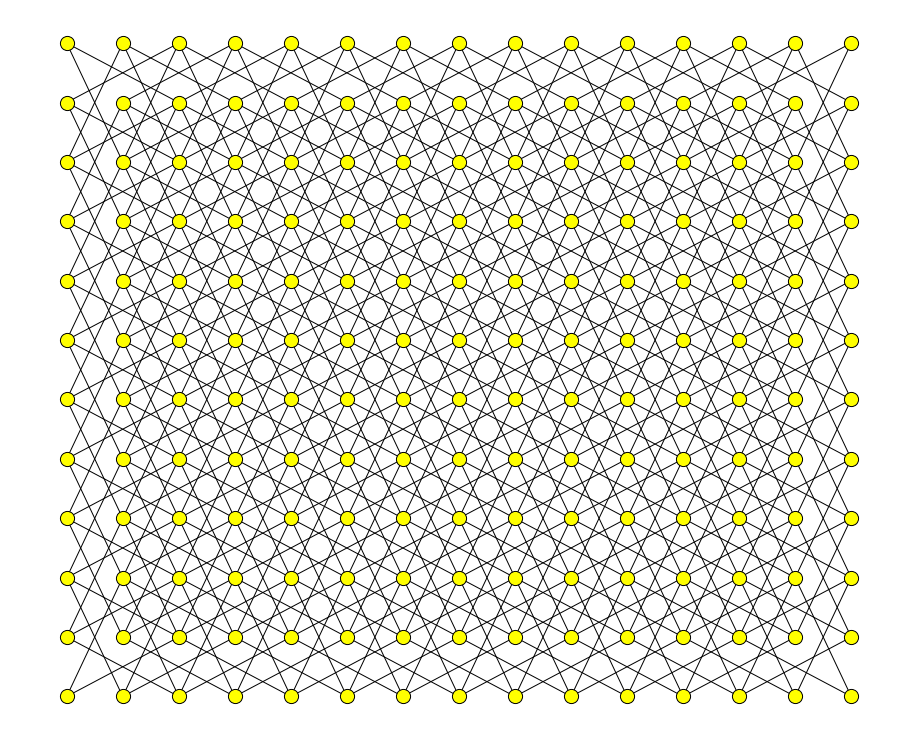

In [169]:
figure(figsize=(12,10))
nx.draw(konjic_skok(15,12),pos=pozicije_konjic(15,12),node_size=200,node_color='yellow',edgecolors='black')